In [4]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
# get the data 
! wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2022-11-26 19:50:37--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  15.5MB/s    in 0.3s    

2022-11-26 19:50:38 (15.5 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [7]:
# read and inspect the data
df = pd.read_csv("bbc_text_cls.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [9]:
df["labels"].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: labels, dtype: int64

(array([510.,   0., 386.,   0.,   0., 417.,   0., 511.,   0., 401.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

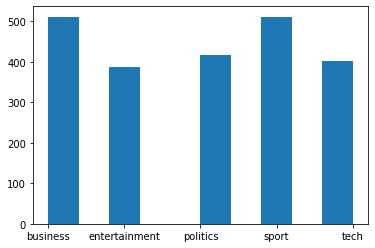

In [10]:
plt.hist(df["labels"])

In [11]:
# train test split

In [12]:
inputs = df["text"]
target = df["labels"]
x_train, x_test, y_train , y_test = train_test_split(inputs, target, test_size=0.3)

In [13]:
cv = CountVectorizer()
cv.fit(x_train)
x_train = cv.transform(x_train)
x_test = cv.transform(x_test)

In [14]:
(x_train!=0).sum()

316185

In [15]:
# get the percentage of none zero values in sparse matrix
(x_train!=0).sum()/np.prod(x_train.shape)

0.007958973847791375

In [16]:
y_train

1192         politics
1919             tech
1486            sport
481          business
1302         politics
            ...      
1511            sport
1355            sport
1093         politics
790     entertainment
954          politics
Name: labels, Length: 1557, dtype: object

In [17]:
# train a model
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [18]:
# finding the score
print(" the accuracy of trained data :{} \n the accuracy of testing data: {}".format(nb.score(x_train, y_train) ,nb.score(x_test, y_test)))


 the accuracy of trained data :0.9942196531791907 
 the accuracy of testing data: 0.9775449101796407


In [25]:
# a model2 with stopwords
x_train, x_test, y_train , y_test = train_test_split(inputs, target, test_size=0.3)
cv_1 = CountVectorizer(stop_words="english")
x_train_1 = cv_1.fit_transform(x_train)
x_test_1 = cv.transform(x_test)

# the model
nb_1 = MultinomialNB()
nb_1.fit(x_train_1, y_train)
print(" the accuracy of trained data :{} \n the accuracy of testing data: ".format(nb_1.score(x_train_1, y_train) ))




 the accuracy of trained data :0.9942196531791907 
 the accuracy of testing data: 


In [84]:
# model3 with lemmatization

# function to map pos
def pos_def(pos_tag):
  if pos_tag.startswith("N"):
    return "n"
  elif pos_tag.startswith("V"):
    return "v"
  elif pos_tag.startswith("J"):
    return "r"
  elif pos_tag.startswith("R"):
    return "r"
  else: return "n"

In [26]:
wnl = WordNetLemmatizer()

In [74]:
from nltk.tag import pos_tag
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [85]:
class lemma:
  def __init__(self):
    self.wnl = WordNetLemmatizer()

  def __call__(self,doc):
    tokens = word_tokenize(doc)
    dic = pos_tag(tokens)
    return [wnl.lemmatize(word, pos=pos_def(tag)) for word,tag in dic]
    
  


In [97]:
# buliding countvectorizer
input_train, input_test, y_train , y_test = train_test_split(inputs, target, test_size=0.3)
cb_2 = CountVectorizer(tokenizer=lemma())
x_train_2 = cb_2.fit_transform(x_train)

In [87]:
x_test_2 = cb_2.fit_transform(x_test)

In [89]:
# Model 3
nb_2 = MultinomialNB()
nb_2.fit(x_train_2, y_train)

MultinomialNB()

In [ ]:
print(" the accuracy of trained data :{} \n the accuracy of testing data: {}".format(nb_3.score(x_train, y_train) ,nb_3.score(x_test, y_test)))


In [93]:
y_train.shape, x_train_2.shape

((1557,), (1557, 24970))

In [95]:
nb_2.score(x_test_2, y_test)

1.0

In [98]:
y_test.shape, x_test_2.shape

((668,), (668, 16607))

In [100]:
# model 3 with stemm
class stem:
  def __init__(self):
    self.ps = nltk.PorterStemmer()
  def __call__(self,doc) :
    tokens = word_tokenize(doc)
    return [self.ps.stem(word) for word in tokens]




In [101]:
# model 3
cv_3 = CountVectorizer(tokenizer= stem())
cv_3.fit(input_train)
x_train = cv_3.transform(input_train)
x_test = cv_3.transform(input_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [105]:
nb_3 = MultinomialNB()
nb_3.fit(x_train, y_train)
nb_3.score(x_test,y_test)
print(" the accuracy of trained data :{} \n the accuracy of testing data: {}".format(nb_3.score(x_train, y_train) ,nb_3.score(x_test, y_test)))


 the accuracy of trained data :0.9922928709055877 
 the accuracy of testing data: 0.9760479041916168


In [107]:
# model 4 with normal tokenuzer

def split(doc):
  return doc.split()

In [108]:
cv_3 = CountVectorizer(tokenizer= split)
cv_3.fit(input_train)
x_train = cv_3.transform(input_train)
x_test = cv_3.transform(input_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [109]:
nb_4 = MultinomialNB()
nb_4.fit(x_train, y_train)
nb_4.score(x_test,y_test)
print(" the accuracy of trained data :{} \n the accuracy of testing data: {}".format(nb_4.score(x_train, y_train) ,nb_4.score(x_test, y_test)))


 the accuracy of trained data :0.9961464354527938 
 the accuracy of testing data: 0.968562874251497
